<a href="https://colab.research.google.com/github/EmilyKan/pycs4001/blob/main/%E7%AC%AC%E4%BA%94%E6%AC%A1%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

evaluation MSE: 0.013446201443205819


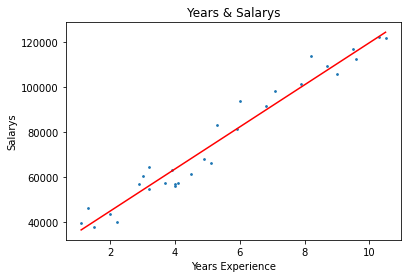

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
X, Y = datasets.make_regression(n_samples=1000, n_features=1, noise=10, random_state=10)


data = pd.read_csv('drive/MyDrive/Colab Notebooks/Salary_Data.csv')

X = np.array(data["YearsExperience"]).reshape(-1,1)
Y = np.array(data["Salary"]).reshape(-1,1)
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.2, random_state=10)

#將數據標準化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

sc_train_x = scaler_x.fit_transform(train_x)
sc_train_y = scaler_y.fit_transform(train_y)

#搭配模型
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
#訓練模型
regression.fit(sc_train_x, sc_train_y)
#評估模型
sc_test_x = scaler_x.transform(test_x)
sc_test_y = scaler_y.transform(test_y)
y_hat = regression.predict(sc_test_x)
print(f"evaluation MSE: {mean_squared_error(sc_test_y, y_hat)}")

Y_hat = regression.predict(scaler_x.transform(X))
Y_inv_hat = scaler_y.inverse_transform(Y_hat)

plt.scatter(X, Y, s =3)
plt.plot(X, Y_inv_hat, color="red")
plt.title('Years & Salarys')
plt.xlabel('Years Experience')
plt.ylabel('Salarys')
plt.show()

